In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

# Loading data
#data = np.load('data2D.npy')
data = np.load('data100D.npy')
[num_pts, dim] = np.shape(data)

is_valid = True

# For Validation set
if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:int(valid_batch)]]
    data = data[rnd_idx[valid_batch:]]


# Distance function for K-means
def distanceFunc(X, MU):
    t1 = -2*tf.matmul(X, MU, transpose_a=False, transpose_b=True)
    sqX = tf.reshape(tf.reduce_sum(tf.square(X), axis=1), [-1, 1])
    sqMU = tf.reshape(tf.reduce_sum(tf.square(MU), axis=1), [1, -1])
    ret = t1 + sqX + sqMU
    return ret

def Loss(X, MU):
    dist = distanceFunc(X, MU)
    temp = tf.reduce_max(-1*dist, axis=1)
    temp = -1*temp
    loss = tf.reduce_sum(temp)
    return dist, loss

def Graph(data, K, alpha):
    N = data.shape[0]
    D = data.shape[1]
    X = tf.placeholder(tf.float32, shape=(N, D), name="X")
    MU = tf.get_variable("MU", initializer=tf.random_normal(shape=[K, D]))
    dist, loss = Loss(X, MU)
    opt = tf.train.AdamOptimizer(learning_rate=alpha, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(loss)
    return dist, X, MU, loss, opt

def ploss(l,l_val,num):
    plt.figure(num)
    plt.title("Loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.plot(range(len(l)), l, 'r-', label="Loss")
    plt.plot(range(len(l)), l_val, 'b-', label="Validation Loss")
    plt.grid()
    plt.legend()
    
def KMC(K,num):
    it = 300
    dist, X, MU, loss, opt = Graph(data, K, 0.1)
    if is_valid:
        N_ = val_data.shape[0]
        D_ = val_data.shape[1]
        X_ = tf.placeholder(tf.float32, shape=(N_, D_), name="X_val")
        MU_ = tf.placeholder(tf.float32, shape=(K, D_), name="MU_val")
        dist_, loss_ = Loss(X_, MU_)
        loss_vec_ = []
    loss_vec = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        for x in range(it):
            _, l, mu, a  = sess.run([opt, loss, MU, dist], feed_dict={X: data})
            if is_valid:
                l_val = sess.run([loss_], feed_dict={X_: val_data, MU_: mu})
                loss_vec_.append(l_val)
            loss_vec.append(l)
    cluster_ = np.argmin(a, axis=1)
    graph_array = np.zeros((K,))
    for i in range(cluster_.shape[0]):
        graph_array[cluster_[i]] += 1
    print(100*graph_array/np.sum(graph_array))
    if not is_valid:
        colors = ["red", "yellow", "green", "blue", "brown"]
        data_c = []
        for i in range(0, data.shape[0]):
            data_c.append(colors[cluster_[i]])
        plt.figure(num)
        plt.ylabel("x2")
        plt.xlabel("x1")
        plt.title("K: "+str(K))
        plt.scatter(data[:,0], data[:,1], c=data_c)
        plt.scatter(mu[:,0], mu[:,1], c=colors[K-1])
        plt.legend(loc=0)
    if is_valid:
        ploss(loss_vec,loss_vec_,num+5)

In [2]:
def KML(K):
    it = 400
    _, X, MU, loss, opt = Graph(data, K, 0.1)
    loss_vec = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        for i in range(it):
            _, l, mu = sess.run([opt, loss, MU], feed_dict={X: data})
            loss_vec.append(l)
    return loss_vec

In [3]:
l = KML(3)

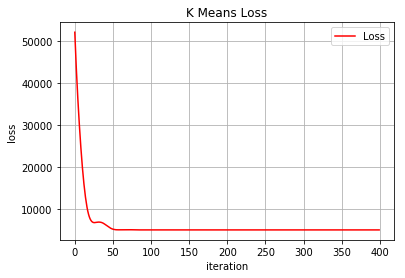

In [4]:
plt.figure(0)
plt.title("K Means Loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(range(len(l)), l, 'r-', label="Loss")
plt.grid()
plt.legend()

No handles with labels found to put in legend.


[100.]


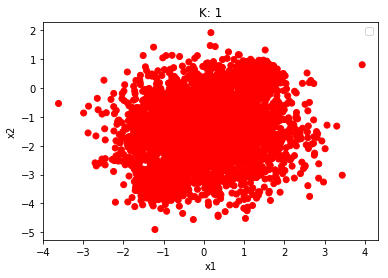

In [2]:
KMC(1,0)

No handles with labels found to put in legend.


[49.55 50.45]


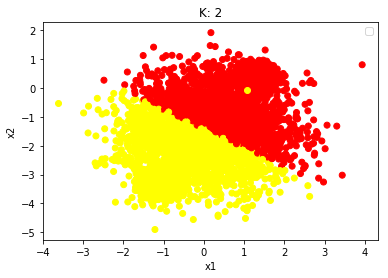

In [2]:
KMC(2,1)

No handles with labels found to put in legend.


[38.06 38.13 23.81]


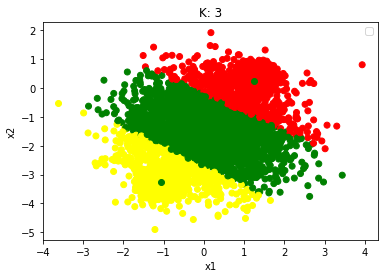

In [2]:
KMC(3,2)

No handles with labels found to put in legend.


[37.13 12.1  37.28 13.49]


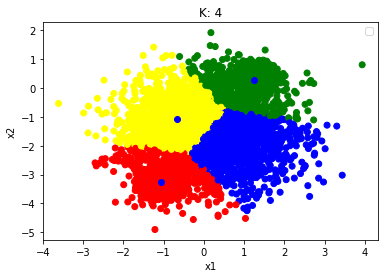

In [2]:
KMC(4,3)

No handles with labels found to put in legend.


[35.92 36.3   7.55  8.87 11.36]


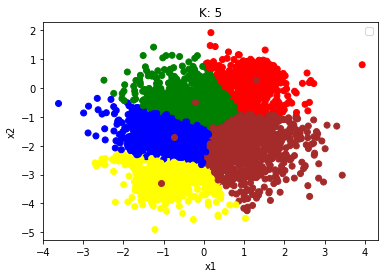

In [2]:
KMC(5,4)

No handles with labels found to put in legend.


[100.]


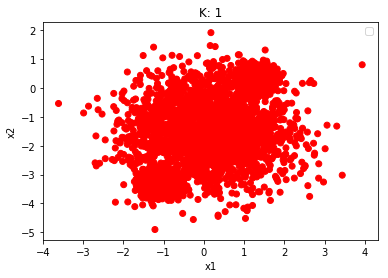

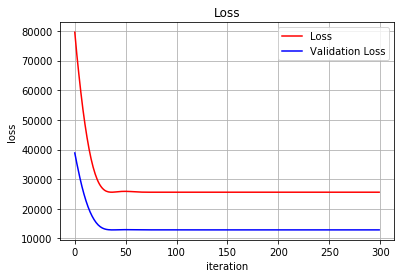

In [2]:
#1/3validation out
KMC(1,5)

No handles with labels found to put in legend.


[49.81250937 50.18749063]


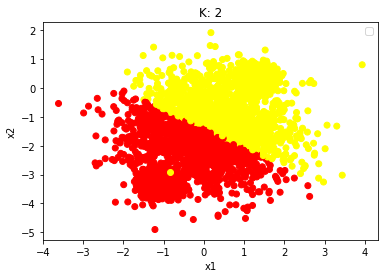

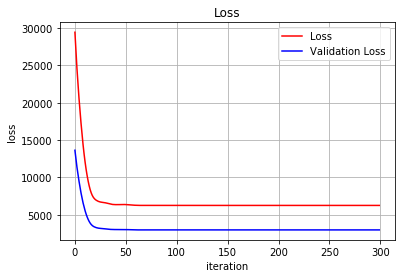

In [2]:
KMC(2,6)

No handles with labels found to put in legend.


[38.41307935 24.07379631 37.51312434]


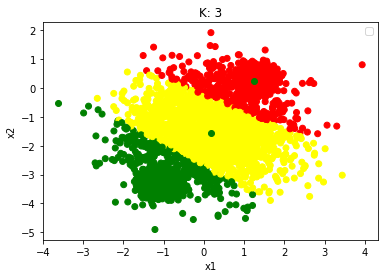

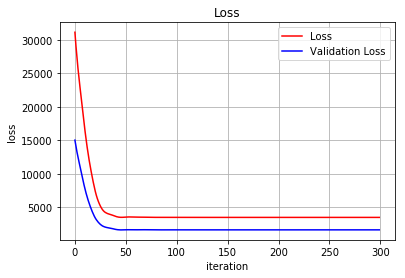

In [2]:
KMC(3,7)

No handles with labels found to put in legend.


[36.32818359 37.63311834 13.72431378 12.31438428]


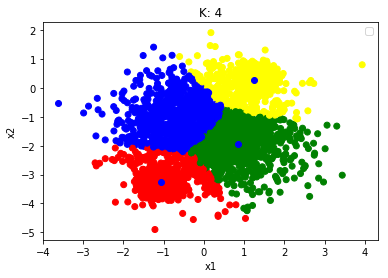

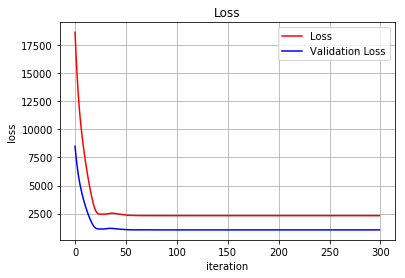

In [2]:
KMC(4,8)

No handles with labels found to put in legend.


[11.38443078  7.70961452  7.48462577 35.98320084 37.43812809]


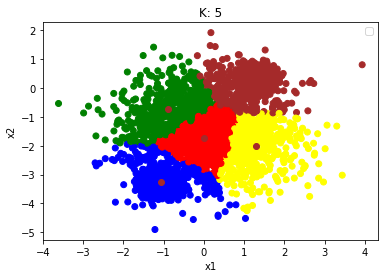

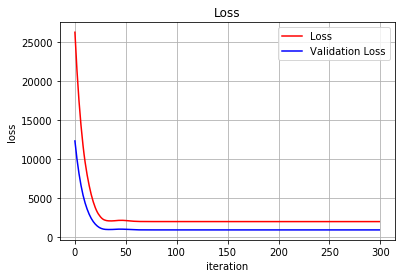

In [2]:
KMC(5,9)

[20.3539823  10.01949903 20.03899805 29.30853457 20.27898605]


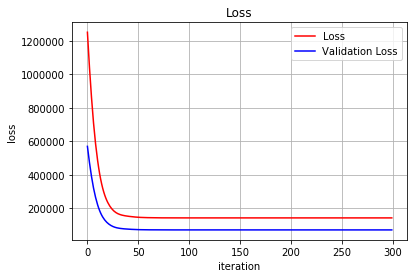

In [2]:
KMC(5,10)

[ 0.          6.50967452 20.03899805 14.87925604  0.119994   14.42927854
 30.37348133  6.52467377  0.          7.12464377]


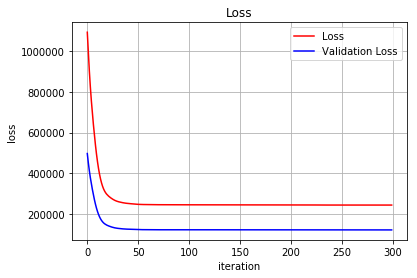

In [2]:
KMC(10,11)

[2.02789861e+01 0.00000000e+00 0.00000000e+00 2.03539823e+01
 2.00389981e+01 7.84460777e+00 6.68966552e+00 0.00000000e+00
 7.28963552e+00 0.00000000e+00 7.46962652e+00 1.49992500e-02
 0.00000000e+00 0.00000000e+00 1.00194990e+01]


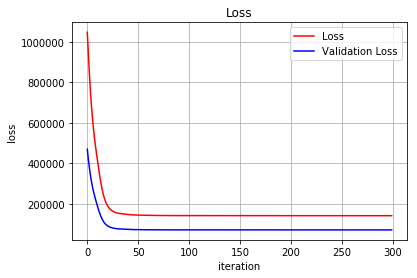

In [2]:
KMC(15,12)

[ 3.52482376  6.86965652  0.          0.          2.89485526  3.70481476
 20.03899805  8.00959952  0.         20.3539823   3.56982151  3.05984701
  0.          0.          8.08459577  0.          0.          6.34468277
 10.01949903  3.52482376]


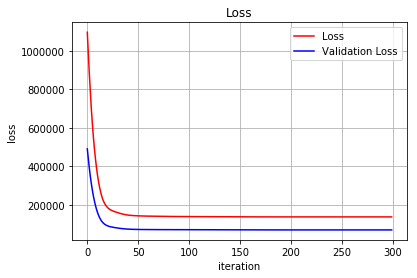

In [2]:
KMC(20,13)

[0.00000000e+00 1.49992500e-02 9.29953502e+00 1.49992500e-02
 0.00000000e+00 2.68486576e+00 0.00000000e+00 3.05984701e+00
 4.49977501e-02 0.00000000e+00 2.03539823e+01 2.03989801e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.64451777e+00
 1.03494825e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.00389981e+01 0.00000000e+00 2.99985001e-02 0.00000000e+00
 3.76481176e+00 2.83485826e+00 1.00194990e+01 2.83485826e+00
 0.00000000e+00 2.96985151e+00]


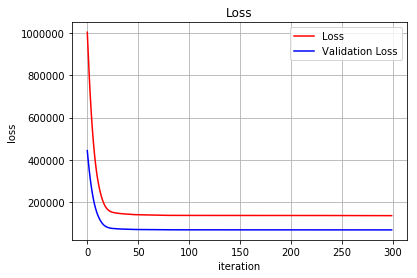

In [2]:
KMC(30,14)